In [20]:
import numpy as np
import astropy.units as u
import matplotlib.pylab as plt
import matplotlib.cm as cm
from astropy.time import Time
import astropy.units as u
from pulsar.predictor import Polyco
import glob
%matplotlib inline

In [27]:
"""
Load all b1957 Pulses
"""

day1 = Time('2014-06-13T06:30:00')
day2 = Time('2014-06-14T06:30:00')
day3 = Time('2014-06-15T06:30:00')
day4 = Time('2014-06-16T06:30:00')

day = day3
SNcut = 12

R1957GPs = np.loadtxt('/media/drive2/b1957-GPs/gp_RCP.txt', dtype='string')
                      
RT = Time(R1957GPs[:,0], precision=5)
RSN = R1957GPs[:,1].astype('float')
Rphase = R1957GPs[:,2].astype('float')

Rphase = Rphase[abs(RT.unix - day.unix) > 18000 ]
RSN = RSN[abs(RT.unix - day.unix) > 18000 ]
RT = RT[abs(RT.unix - day.unix) > 18000 ]

Rphase = Rphase[RSN>SNcut]
RT = RT[RSN>SNcut]
RSN = RSN[RSN>SNcut]


L1957GPs = np.loadtxt('/media/drive2/b1957-GPs/gp_LCP.txt', dtype='string')
                      
LT = Time(L1957GPs[:,0], precision=5)
LSN = L1957GPs[:,1].astype('float')
Lphase = L1957GPs[:,2].astype('float')

Lphase = Lphase[abs(LT.unix - day3.unix) > 18000 ]
LSN = LSN[abs(LT.unix - day3.unix) > 18000 ]
LT = LT[abs(LT.unix - day3.unix) > 18000 ]

Lphase = Lphase[LSN>SNcut]
LT = LT[LSN>SNcut]
LSN = LSN[LSN>SNcut]


(0, 0.001)

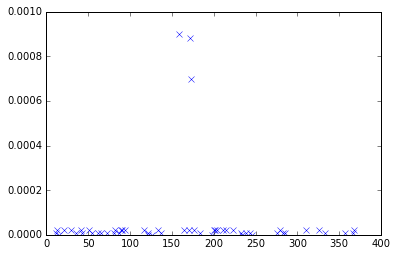

In [28]:
# Look at difference between times, eliminate double flags

dRT = np.diff(RT.unix)

plt.plot(dRT, 'bx')
plt.ylim(0,1e-3)
#plt.yscale('log')

In [32]:
# based on above plot, eliminate pulses with dt < 2e-4

dupes1 = RSN[1:][(dRT<2e-4) & (dRT > 0)]
dupes2 = RSN[:-1][(dRT<2e-4) & (dRT > 0)]
Tdupe1 = RT[1:][(dRT<2e-4) & (dRT > 0)]
Tdupe2 = RT[:-1][(dRT<2e-4) & (dRT > 0)]

Tdupe = np.zeros_like(Tdupe1)

for i in range(len(Tdupe1)):
    if dupes1[i] <= dupes2[i]:
        Tdupe[i] = Tdupe1[i]
    else:
        Tdupe[i] = Tdupe2[i]
        
duplicates = np.where(np.in1d(RT, Tdupe))[0]

ERROR! Session/line number was not unique in database. History logging moved to new session 1639


In [34]:
RT = np.delete(RT, duplicates)
RSN = np.delete(RSN, duplicates)
Rphase = np.delete(Rphase, duplicates)

(0, 0.001)

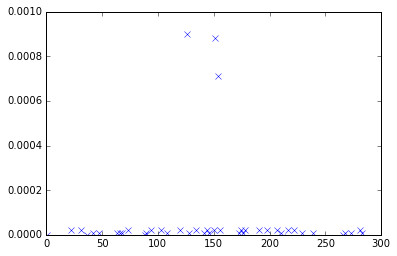

In [35]:
# Look at difference between times, eliminate double flags

dLT = np.diff(LT.unix)

plt.plot(dLT, 'bx')
plt.ylim(0,1e-3)
#plt.yscale('log')

In [36]:
# based on above plot, eliminate pulses with dt < 2e-4

dupes1 = LSN[1:][(dLT<2e-4) & (dLT > 0)]
dupes2 = LSN[:-1][(dLT<2e-4) & (dLT > 0)]
Tdupe1 = LT[1:][(dLT<2e-4) & (dLT > 0)]
Tdupe2 = LT[:-1][(dLT<2e-4) & (dLT > 0)]

Tdupe = np.zeros_like(Tdupe1)

for i in range(len(Tdupe1)):
    if dupes1[i] <= dupes2[i]:
        Tdupe[i] = Tdupe1[i]
    else:
        Tdupe[i] = Tdupe2[i]
        
duplicates = np.where(np.in1d(LT, Tdupe))[0]

LT = np.delete(LT, duplicates)
LSN = np.delete(LSN, duplicates)
Lphase = np.delete(Lphase, duplicates)

In [37]:
# Find all values intersecting between L and R

b = np.intersect1d(Time(RT).unix, Time(LT).unix, assume_unique=True)

print LT.shape, RT.shape
print b.shape

(255,) (325,)
(115,)


In [38]:
with open('gp_RCP_SN12clean.txt','w') as Rfile:
    for i in range(len(RT)):
        Rfile.write("{0} {1} {2}\n".format(RT[i], RSN[i], Rphase[i]))

with open('gp_LCP_SN12clean.txt','w') as Lfile:
    for i in range(len(LT)):
        Lfile.write("{0} {1} {2}\n".format(LT[i], LSN[i], Lphase[i]))     

In [ ]:
print Tdupes